In [40]:
%pylab inline
import gala.potential as gp
import gala.dynamics as gd
from gala.units import galactic
import astropy.units as u


Populating the interactive namespace from numpy and matplotlib


In [2]:
from soda import profiles
import soda

## LMC orbits:

In [32]:
# Initial conditions!

sat_pos = np.array([-1, -41, -28])
sat_vel = np.array([-57, -226, 221])
pos_host = np.array([0,0,0])
vel_host = np.array([0,0,0])
host_model = ['NFW', 1E12, 261, 9.86]
disk_params = [6.5E10, 3.5, 0.53]
bulge_params = [1E10, 0.7]
alpha = [0, 1]
time = 8.0
d_t = [0.1, 0.01, 0.001]

In [29]:
# From Gomez 15 et al
sat_mass = [3E10, 5E10, 8E10, 1E11, 1.8E11, 2.5E11]
sat_rs = [8, 11, 14, 15, 20, 22.5]



In [30]:
bulge_params

[10000000000.0, 0.7]

using the  LMC1
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC2
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC3
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC4
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC5
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1
using the  LMC6
Host:  0.0 0.0 0.0
Satellite 1 : -1.0 -41.0 -28.0
done t=1


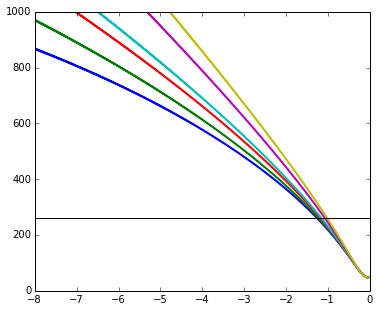

In [36]:
#for i in range(0,3):
figure(figsize=(6,5))
lmc_models = ['LMC1', 'LMC2', 'LMC3', 'LMC4', 'LMC5', 'LMC6']
for i in lmc_models:
    t, xyz_sat, vxyz_sat, xyz_host, vxyz_host = soda.leapfrog.integrate_sat(time,pos_host ,
                                                      vel_host, host_model,  
                                                      disk_params, bulge_params,
                                                      dt=0.01, lmc_model=i)
    plot(t, np.sqrt((xyz_sat[:,0]-xyz_host[:,0])**2.0+(xyz_sat[:,1]-xyz_host[:,1])**2.0
                +(xyz_sat[:,2]-xyz_host[:,2])**2.0), lw=2.0)
    plt.axhline(261, lw=1.0, c='k')
    ylim(0, 1000)

In [16]:
def read_orbits_data(filename):
    data = np.loadtxt('../../orbits/data/test/'+filename+'_free_host.txt')
    data_sat = np.loadtxt('../../orbits/data/test/'+filename+'_free_sat.txt')
    
    x_gal = data[:,1] - data_sat[:,1]
    y_gal = data[:,2] - data_sat[:,2]
    z_gal = data[:,3] - data_sat[:,3]

    vx_gal = data[:,4] - data_sat[:,4]
    vy_gal = data[:,5] - data_sat[:,5]
    vz_gal = data[:,6] - data_sat[:,6]

    
    time = data[:,0]
    
    
    return time, x_gal, y_gal, z_gal, vx_gal, vy_gal, vz_gal

In [23]:
tlmc3, xlmc3, ylmc3, zlmc3, vxlmc3, vylmc3, vzlmc3 = read_orbits_data('LMC_3E10_1E12')
tlmc5, xlmc5, ylmc5, zlmc5, vxlmc5, vylmc5, vzlmc5 = read_orbits_data('LMC_5E10_1E12')
tlmc8, xlmc8, ylmc8, zlmc8, vxlmc8, vylmc8, vzlmc8 = read_orbits_data('LMC_8E10_1E12')
tlmc10, xlmc10, ylmc10, zlmc10, vxlmc10, vylmc10, vzlmc10 = read_orbits_data('LMC_1E11_1E12')
tlmc18, xlmc18, ylmc18, zlmc18, vxlmc18, vylmc18, vzlmc18 = read_orbits_data('LMC_18E10_1E12')
tlmc25, xlmc25, ylmc25, zlmc25, vxlmc25, vylmc25, vzlmc25 = read_orbits_data('LMC_25E10_1E12')

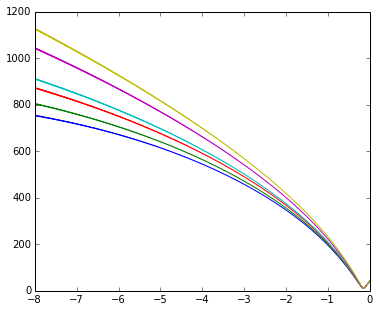

In [25]:
figure(figsize=(6,5))

plot(tlmc3, np.sqrt(xlmc3**2 + ylmc3**2.0 + zlmc3))
plot(tlmc5, np.sqrt(xlmc5**2 + ylmc5**2.0 + zlmc5))
plot(tlmc8, np.sqrt(xlmc8**2 + ylmc8**2.0 + zlmc8))
plot(tlmc10, np.sqrt(xlmc10**2 + ylmc10**2.0 + zlmc10))
plot(tlmc18, np.sqrt(xlmc18**2 + ylmc18**2.0 + zlmc18))
plot(tlmc25, np.sqrt(xlmc25**2 + ylmc25**2.0 + zlmc25))

## orbits test comparing with Galpy:

In [41]:
pot = gp.MiyamotoNagaiPotential(m=2.5E11*u.Msun, a=6.5*u.kpc, b=0.26*u.kpc, units=galactic)
w0 = gd.CartesianPhaseSpacePosition(pos=[11., 0., 0.2]*u.kpc, vel=[0., 200, 100]*u.km/u.s)
orbit = pot.integrate_orbit(w0, dt=1., n_steps=1000)

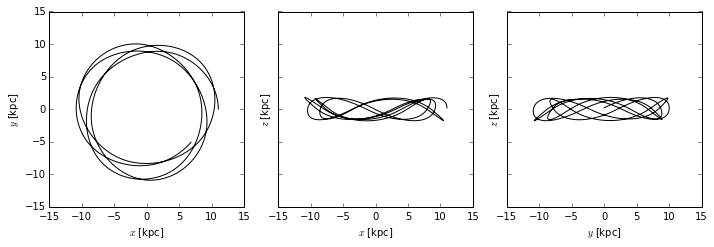

In [44]:
fig = orbit.plot(c='k')

In [ ]:
host_model 

In [ ]:
t, xyz_sat, vxyz_sat, xyz_host, vxyz_host = soda.leapfrog.integrate_sat(time,pos_host ,
                                                      vel_host, host_model,  
                                                      disk_params, bulge_params,
                                                      dt=0.01)